# Upper Confidence Bound (UCB)

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [32]:
import math

# N = number of users we're showing an ad to
N = 1000
 
# d = number of ads we are testing
d = 10
 
# list of ads we've chosen to show to each users (length = N)
ads_selected = []
 
# list tracking the count of times each ad has been shown to users (length = d)
number_of_selections = [0] * d
 
# list tracking the count of times each ad has been clicked by a user
sum_of_rewards = [0] * d
 
# count of the total times users have clicked an ad
total_reward = 0 
 
# n is an int representing each user
for n in range(0, N):
  # ad = the number of the ad (column number)
  ad = 0 
  # max_upper_bound is the highest upper bound among our 10 ads
  max_upper_bound = 0 
 
  # i is an int representing each ad
  for i in range(0, d):
    # if the ad has been shown to a user at least once:
    if number_of_selections[i] > 0:
      # average_reward is the (number of times ad is clicked) / (number of times ad is shown)
      average_reward = sum_of_rewards[i] / number_of_selections[i]
      # delta_i is the confidence interval formula we saw in the video
      delta_i = math.sqrt(3/2 * math.log(n + 1)/number_of_selections[i])
      # this is the upper confidence bound, our average clickrate of the ad + the confidence interval of the ad
      upper_bound = average_reward + delta_i
    else:
      # ad hasn't been shown yet so we set a higher upper_bound to force it to be selected
      upper_bound = 1e400
 
    # as loop through our 10 ads, we use this max_upper_bound to track which of our 10 ads has the highest upper_bound
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad=i # ad i is the ad we will show the user
  
  # add i to our list tracking which ads we've shown
  ads_selected.append(ad) 
  # add 1 to our count of times we've shown ad i
  number_of_selections[ad] += 1
  # look up in our dataset and check whether user n clicks ad i 
  # 1 means they clicked the ad, 0 means they didn't click the ad
  reward = dataset.values[n, ad] 
  # add that reward to our count of times ad i has been clicked
  sum_of_rewards[ad] += reward
  # add that reward to our count of times *ANY* ad has been clicked
  total_reward += reward

## Visualising Results

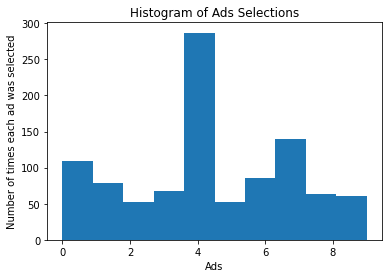

In [33]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()